# Regression Problem

## 0. Initialize

In [1]:
#mathematics
using LinearAlgebra

#statistics
using Random

#visualize
using Plots
pyplot()

#macros
using UnPack

## 1. Create data

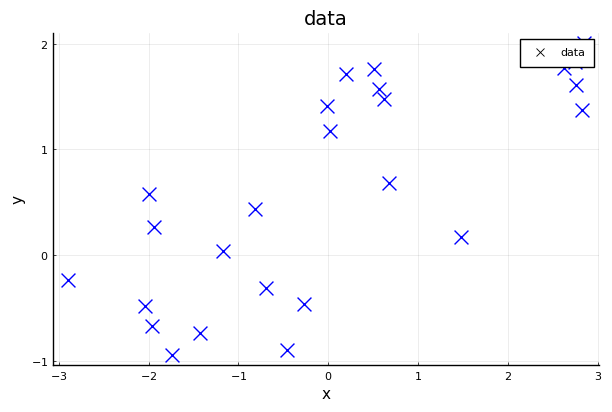

In [2]:
#sample X and Y
Random.seed!(42)
F(x) = 0.7*(sin(3*x) + cos(2*x) + sin(5*x))
N = 25
X = 6*(rand(N).-0.5)
Y = F.(X) + 0.5*randn(N)

#plot the data
fig1 = plot(X, Y, st=:scatter, xlabel="x", ylabel="y", title="data", label="data", 
    markershape=:x, markerstrokewidth=1, markersize=10, markercolor=:blue)
savefig(fig1, "figs-RP/fig1.png")

## 2. Define functions

In [3]:
#basis function 
ϕi(x,μi,σi) = exp(-(x-μi)^2/σi/σi/2)
function ϕ(x,params)
    @unpack μs,σs,dw = params
    vals = ones(dw)
    for i in 1:dw-1
        vals[i+1] = ϕi(x,μs[i],σs[i])
    end
    return vals
end

#design matrix
function design_matrix(X,params)
    N = length(X)
    mat = zeros(N,dw)
    for n in 1:N
        mat[n,:] = ϕ(X[n],params)
    end
    return mat
end

#model
f(x,wvec,params) = dot(wvec, ϕ(x,params))

f (generic function with 1 method)

## 3. Estimation

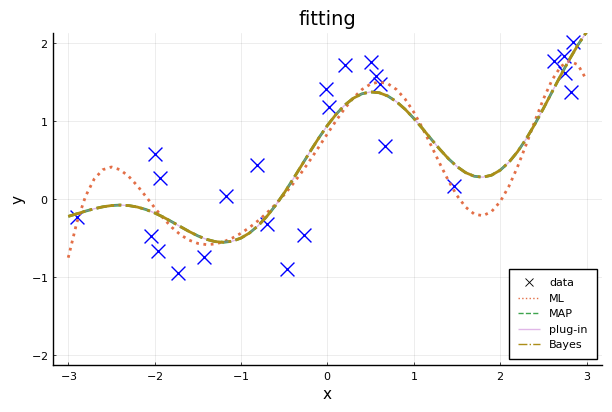

In [4]:
#define model
σ = 1
λw = 0.01
dw = 8
μs = [-3,-2,-1,0,1,2,3]
σs = ones(dw-1)
params = (σ=σ, λw=λw, μs=μs, σs=σs, dw=dw, N=N)

#matrix, vector
Φ = design_matrix(X,params)
ΦTΦ = Φ' * Φ
ΦTy = Φ' * Y

#maximum liklihood
wML = ΦTΦ\ΦTy

#MAP estimate
α = σ^2*λw
wMAP = (ΦTΦ+α*I(dw))\ΦTy

#mean plugin
wmean = (ΦTΦ/σ/σ+λw*I(dw))\(ΦTy/σ/σ)

#Bayes estimate
function μpred(x,params)
    @unpack σ,λw,dw = params
    tmp1 = (ΦTΦ+ϕ(x,params)*ϕ(x,params)'+σ^2*λw*I(dw))\ΦTy
    tmp2 = (ΦTΦ+ϕ(x,params)*ϕ(x,params)'+σ^2*λw*I(dw))\ϕ(x,params)
    return dot(ϕ(x,params), tmp1)/(1-dot(ϕ(x,params), tmp2))
end

#visualize
fig2 = plot(X,Y,st=:scatter,xlabel="x",ylabel="y",title="fitting",label="data",ylim=[-2,2],legend=:bottomright,
    markershape=:x, markerstrokewidth=1, markersize=10, markercolor=:blue)
plot!(-3:0.1:3, x->f(x,wML,params), label="ML", ls=:dot, lw=2)
plot!(-3:0.1:3, x->f(x,wMAP,params), label="MAP", ls=:dash, lw=2)
plot!(-3:0.1:3, x->f(x,wmean,params), label="plug-in", ls=:solid, lw=1, alpha=0.5)
plot!(-3:0.1:3, x->μpred(x,params), label="Bayes", ls=:dashdot, lw=2)
savefig(fig2, "figs-RP/fig2.png")